In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Hugo's Portfolio/Realized Volatility Predictability through Neural Network and Financial Turbulence Research/New Version/Model 3/S&P 500 Realized Volatility.xlsx",index_col='Date',parse_dates=True)

In [ ]:
df.drop(columns=["S&P 500 Financial Turbulence"], inplace=True)
df.head()

,Realised,Market Excess Return (MKT),Short Term Reversal Factor (RMW),S&P 500 Dividend Yield,Measure of default risk of corporate bonds:\ndifference of BAA and AAA bond yields
Date,,,,,
2017-11-02,0.004873,0.06,-0.25,1.87,0.007000
2017-11-03,0.003036,0.31,-0.15,1.87,0.007006
2017-11-06,0.001808,0.06,-0.64,1.87,0.007011
2017-11-07,0.003225,-0.20,0.46,1.87,0.007017
2017-11-08,0.002568,0.12,0.56,1.87,0.007022


# Hyperparameter Search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()
from numpy.random import seed
from random import randrange

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[3,5,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
18/18 [==============================] - 10s 18ms/step - loss: 0.0132 - acc: 0.0018
Epoch 2/3
18/18 [==============================] - 0s 18ms/step - loss: 0.0132 - acc: 0.0018
Epoch 3/3
1/1 [==============================] - 0s 18ms/step
Epoch: 3 | Inputs: 189 | Nodes: 168 | Dropout: 0.4 | Loss: mse
RMSE: 0.006125809876399395 | Accuracy: -4.668281944160824
Epoch 1/15
22/22 [==============================] - 2s 7ms/step - loss: 0.1007 - acc: 0.0014
Epoch 2/15
22/22 [==============================] - 0s 7ms/step - loss: 0.0765 - acc: 0.0014
Epoch 3/15
22/22 [==============================] - 0s 7ms/step - loss: 0.0693 - acc: 0.0014
Epoch 4/15
22/22 [==============================] - 0s 7ms/step - loss: 0.0605 - acc: 0.0014
Epoch 5/15
22/22 [==============================] - 0s 6ms/step - loss: 0.0526 - acc: 0.0014
Epoch 6/15
22/22 [==============================] - 0s 6ms/step - loss: 0.0480 - acc: 0.0014
Epoch 7/15
22/22 [==============================] - 0s 6ms/step - loss: 

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 2s 10ms/step - loss: 0.0117 - acc: 0.0015
Epoch 2/3
21/21 [==============================] - 0s 10ms/step - loss: 0.0097 - acc: 0.0015
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch: 3 | Inputs: 84 | Nodes: 56 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.010773107972646464 | Accuracy: -97.48739365969186
Epoch 1/3
23/23 [==============================] - 2s 5ms/step - loss: 0.0767 - acc: 0.0014
Epoch 2/3
23/23 [==============================] - 0s 5ms/step - loss: 0.0690 - acc: 0.0014
Epoch 3/3
1/1 [==============================] - 0s 21ms/step
Epoch: 3 | Inputs: 21 | Nodes: 168 | Dropout: 0.2 | Loss: mae
RMSE: 0.005017758547186817 | Accuracy: 17.369290839773775
Epoch 1/10
21/21 [==============================] - 2s 8ms/step - loss: 0.0038 - acc: 0.0015
Epoch 2/10
21/21 [==============================] - 0s 8ms/step - loss: 0.0031 - acc: 0.0015
Epoch 3/10
21/21 [==============================] - 0s 8ms/step - loss: 0.

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
16/16 [==============================] - 3s 19ms/step - loss: 0.0252 - acc: 0.0020
Epoch 2/5
16/16 [==============================] - 0s 14ms/step - loss: 0.0122 - acc: 0.0020
Epoch 3/5
16/16 [==============================] - 0s 11ms/step - loss: 0.0091 - acc: 0.0020
Epoch 4/5
16/16 [==============================] - 0s 10ms/step - loss: 0.0075 - acc: 0.0020
Epoch 5/5
1/1 [==============================] - 0s 22ms/step
Epoch: 5 | Inputs: 252 | Nodes: 42 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.003945495993312292 | Accuracy: 6.934909271837064
Epoch 1/5
20/20 [==============================] - 3s 9ms/step - loss: 0.0673 - acc: 0.0016
Epoch 2/5
20/20 [==============================] - 0s 8ms/step - loss: 0.0079 - acc: 0.0016
Epoch 3/5
20/20 [==============================] - 0s 8ms/step - loss: 0.0058 - acc: 0.0016
Epoch 4/5
20/20 [==============================] - 0s 7ms/step - loss: 0.0048 - acc: 0.0016
Epoch 5/5
1/1 [==============================] - 0s 47ms/step
Epoch: 5 |

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
20/20 [==============================] - 2s 10ms/step - loss: 0.0621 - acc: 0.0016
Epoch 2/15
20/20 [==============================] - 0s 8ms/step - loss: 0.0553 - acc: 0.0016
Epoch 3/15
20/20 [==============================] - 0s 8ms/step - loss: 0.0489 - acc: 0.0016
Epoch 4/15
20/20 [==============================] - 0s 8ms/step - loss: 0.0508 - acc: 0.0016
Epoch 5/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0551 - acc: 0.0016
Epoch 6/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0546 - acc: 0.0016
Epoch 7/15
20/20 [==============================] - 0s 8ms/step - loss: 0.0479 - acc: 0.0016
Epoch 8/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0414 - acc: 0.0016
Epoch 9/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0389 - acc: 0.0016
Epoch 10/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0371 - acc: 0.0016
Epoch 11/15
20/20 [==============================] - 0s 7ms/step - l

Epoch: 15 | Inputs: 63 | Nodes: 56 | Dropout: 0.2 | Loss: mae
RMSE: 0.002544940676375556 | Accuracy: 62.96378447024985

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.8)]
test = df.iloc[int(len(df['Realised'])*0.8):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.8)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 5
n_input = 63
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(56, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=15)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)

Epoch 1/15
30/30 [==============================] - 3s 7ms/step - loss: 0.0808 - accuracy: 0.0011 - mean_absolute_error: 0.0808
Epoch 2/15
30/30 [==============================] - 0s 7ms/step - loss: 0.0638 - accuracy: 0.0011 - mean_absolute_error: 0.0638
Epoch 3/15
30/30 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.0011 - mean_absolute_error: 0.0539
Epoch 4/15
30/30 [==============================] - 0s 6ms/step - loss: 0.0493 - accuracy: 0.0011 - mean_absolute_error: 0.0493
Epoch 5/15
30/30 [==============================] - 0s 6ms/step - loss: 0.0470 - accuracy: 0.0011 - mean_absolute_error: 0.0470
Epoch 6/15
30/30 [==============================] - 0s 6ms/step - loss: 0.0444 - accuracy: 0.0011 - mean_absolute_error: 0.0444
Epoch 7/15
30/30 [==============================] - 0s 6ms/step - loss: 0.0428 - accuracy: 0.0011 - mean_absolute_error: 0.0428
Epoch 8/15
30/30 [==============================] - 0s 6ms/step - loss: 0.0424 - accuracy: 0.0011 - mean

In [ ]:
RMSE

[0.003302911848851232,
 0.0039320135127276865,
 0.0032882965176540143,
 0.003473198467987626,
 0.003633225143811148,
 0.003074227015518101,
 0.003140503542376617,
 0.00343438231901838,
 0.0033124823676853733,
 0.0033190301658787688]

In [ ]:
Accuracy

[71.19121234722701,
 67.46572619582125,
 64.51465421579559,
 70.14947326820187,
 65.18692377811824,
 70.38593913291224,
 66.72129494907284,
 70.90685789832946,
 72.38867280661934,
 70.74929181481455]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.8):].reset_index()

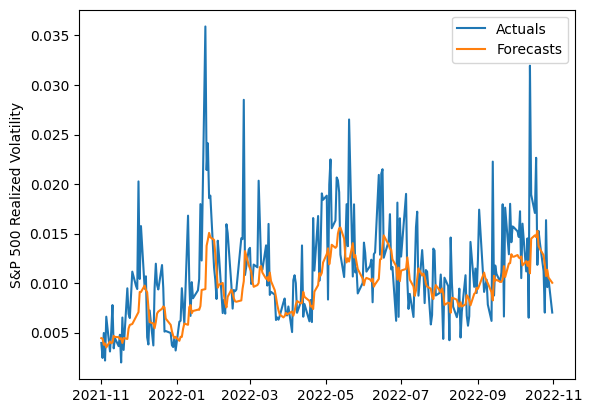

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

In [ ]:
forecasts=true_predictions

In [ ]:
my_df = {'Forecasts': forecasts.reshape(252)}
df = pd.DataFrame(my_df)
df.to_csv('Model 3 Forecasts.csv', index = True)